In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

path = r'C:/Users/osr18/Jupyter_notebook/fifa_seungryul/data.csv'

fifa_temp = pd.read_csv(path)

In [2]:
#pd.set_option('display.max_columns', None)

In [3]:
#fifa_temp.isna().sum()

In [4]:
fifa_temp.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

# 데이터 전처리
### 칼럼이 너무 많아서 두개로 나눔 1)Wage에 영향을 주는 인자 찾기, 2)Overall에 영향을 주는 인자 찾기

In [5]:
fifa_sort_columns= fifa_temp[['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value', 'Wage', 'Special',
                             'Preferred Foot', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Position', 
                             'Jersey Number', 'Joined', 'Height', 'Weight']]
fifa_sort_columns_ability = fifa_temp[['ID', 'Overall', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
                                       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
                                       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina',
                                       'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
                                       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 
                                       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']]

In [6]:
fifa_sort_columns.head(5)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,Jersey Number,Joined,Height,Weight
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,5.0,4.0,4.0,RF,10.0,"Jul 1, 2004",5'7,159lbs
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,Right,5.0,4.0,5.0,ST,7.0,"Jul 10, 2018",6'2,183lbs
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,Right,5.0,5.0,5.0,LW,10.0,"Aug 3, 2017",5'9,150lbs
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,Right,4.0,3.0,1.0,GK,1.0,"Jul 1, 2011",6'4,168lbs
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,Right,4.0,5.0,4.0,RCM,7.0,"Aug 30, 2015",5'11,154lbs


In [7]:
#fifa_sort_columns.groupby(by='Position', sort=False)
#fifa_sort_columns.groupby(by='Position', as_index=True).mean()

In [8]:
#fifa_sort_position = fifa_sort_columns.groupby(by='Position').count().sort_values(by=['ID'], ascending=False)
#fifa_sort_position['ID']

### wage, value 값 변경해서 분석, 우리는 먼저 어떤 선수가 가장 높은 wage를 받는지 예측해보겠음

In [30]:
def value_to_int(df_value):
    try:
        value = float(df_value[1:-1])
        suffix = df_value[-1:]

        if suffix == 'M':
            value = value * 1000000
        elif suffix == 'K':
            value = value * 1000
    except ValueError:
        value = 0
    return value

fifa_sort_columns['Wage_new'] = fifa_sort_columns['Wage'].apply(value_to_int)
fifa_sort_columns['Value_new'] = fifa_sort_columns['Value'].apply(value_to_int)

In [31]:
fifa_sort_columns

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,International Reputation,Weak Foot,Skill Moves,Position,Jersey Number,Joined,Height,Weight,Wage_new,Value_new
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,...,5.0,4.0,5.0,ST,7.0,"Jul 10, 2018",6'2,183lbs,405000.0,77000000.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,...,5.0,5.0,5.0,LW,10.0,"Aug 3, 2017",5'9,150lbs,290000.0,118500000.0
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,...,4.0,3.0,1.0,GK,1.0,"Jul 1, 2011",6'4,168lbs,260000.0,72000000.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,...,4.0,5.0,4.0,RCM,7.0,"Aug 30, 2015",5'11,154lbs,355000.0,102000000.0
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,€93M,€340K,2142,...,4.0,4.0,4.0,LF,10.0,"Jul 1, 2012",5'8,163lbs,340000.0,93000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,England,47,65,Crewe Alexandra,€60K,€1K,1307,...,1.0,2.0,2.0,CM,22.0,"May 3, 2017",5'9,134lbs,1000.0,60000.0
18203,243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,€60K,€1K,1098,...,1.0,2.0,2.0,ST,21.0,"Mar 19, 2018",6'3,170lbs,1000.0,60000.0
18204,241638,B. Worman,16,England,47,67,Cambridge United,€60K,€1K,1189,...,1.0,3.0,2.0,ST,33.0,"Jul 1, 2017",5'8,148lbs,1000.0,60000.0
18205,246268,D. Walker-Rice,17,England,47,66,Tranmere Rovers,€60K,€1K,1228,...,1.0,3.0,2.0,RW,34.0,"Apr 24, 2018",5'10,154lbs,1000.0,60000.0


In [32]:
fifa_sort_columns.dropna(how='any')
#fifa_sort_columns.drop(fifa_sort_columns.loc[fifa_sort_columns['Club'] == 'FC Barcelona'].index)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,International Reputation,Weak Foot,Skill Moves,Position,Jersey Number,Joined,Height,Weight,Wage_new,Value_new
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,...,5.0,4.0,5.0,ST,7.0,"Jul 10, 2018",6'2,183lbs,405000.0,77000000.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,...,5.0,5.0,5.0,LW,10.0,"Aug 3, 2017",5'9,150lbs,290000.0,118500000.0
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,...,4.0,3.0,1.0,GK,1.0,"Jul 1, 2011",6'4,168lbs,260000.0,72000000.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,...,4.0,5.0,4.0,RCM,7.0,"Aug 30, 2015",5'11,154lbs,355000.0,102000000.0
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,€93M,€340K,2142,...,4.0,4.0,4.0,LF,10.0,"Jul 1, 2012",5'8,163lbs,340000.0,93000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,England,47,65,Crewe Alexandra,€60K,€1K,1307,...,1.0,2.0,2.0,CM,22.0,"May 3, 2017",5'9,134lbs,1000.0,60000.0
18203,243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,€60K,€1K,1098,...,1.0,2.0,2.0,ST,21.0,"Mar 19, 2018",6'3,170lbs,1000.0,60000.0
18204,241638,B. Worman,16,England,47,67,Cambridge United,€60K,€1K,1189,...,1.0,3.0,2.0,ST,33.0,"Jul 1, 2017",5'8,148lbs,1000.0,60000.0
18205,246268,D. Walker-Rice,17,England,47,66,Tranmere Rovers,€60K,€1K,1228,...,1.0,3.0,2.0,RW,34.0,"Apr 24, 2018",5'10,154lbs,1000.0,60000.0


In [15]:
fifa_sort_columns.isna().sum()

ID                             0
Name                           0
Age                            0
Nationality                    0
Overall                        0
Potential                      0
Club                         241
Value                          0
Wage                           0
Special                        0
Preferred Foot                48
International Reputation      48
Weak Foot                     48
Skill Moves                   48
Position                      60
Jersey Number                 60
Joined                      1553
Height                        48
Weight                        48
Wage_new                       0
Value_new                      0
dtype: int64

In [20]:
fifa_sort_columns.dropna(subset=['Club'])

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,International Reputation,Weak Foot,Skill Moves,Position,Jersey Number,Joined,Height,Weight,Wage_new,Value_new
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,...,5.0,4.0,4.0,RF,10.0,"Jul 1, 2004",5'7,159lbs,565000.0,110500000.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,...,5.0,4.0,5.0,ST,7.0,"Jul 10, 2018",6'2,183lbs,405000.0,77000000.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,...,5.0,5.0,5.0,LW,10.0,"Aug 3, 2017",5'9,150lbs,290000.0,118500000.0
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,...,4.0,3.0,1.0,GK,1.0,"Jul 1, 2011",6'4,168lbs,260000.0,72000000.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,...,4.0,5.0,4.0,RCM,7.0,"Aug 30, 2015",5'11,154lbs,355000.0,102000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,England,47,65,Crewe Alexandra,€60K,€1K,1307,...,1.0,2.0,2.0,CM,22.0,"May 3, 2017",5'9,134lbs,1000.0,60000.0
18203,243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,€60K,€1K,1098,...,1.0,2.0,2.0,ST,21.0,"Mar 19, 2018",6'3,170lbs,1000.0,60000.0
18204,241638,B. Worman,16,England,47,67,Cambridge United,€60K,€1K,1189,...,1.0,3.0,2.0,ST,33.0,"Jul 1, 2017",5'8,148lbs,1000.0,60000.0
18205,246268,D. Walker-Rice,17,England,47,66,Tranmere Rovers,€60K,€1K,1228,...,1.0,3.0,2.0,RW,34.0,"Apr 24, 2018",5'10,154lbs,1000.0,60000.0


In [11]:
#fifa_sort_columns.Wage.value_counts() #wage는 상당히 다양해서 cat으로?
#fifa_sort_columns['Wage_new'] = fifa_sort_columns['Wage'].str.replace('€', '')
#fifa_sort_columns['Wage_new'] = fifa_sort_columns['Wage'].str.extract(r'(\d+)', expand=False)
#fifa_sort_columns['Value_new'] = fifa_sort_columns['Value'].str.extract(r'(\d+)', expand=False)

#fifa_sort_columns['Value_new'] = fifa_sort_columns['Value_new'].astype('int64')
#fifa_sort_columns['Wage_new'] = fifa_sort_columns['Wage_new'].astype('int64')

In [12]:
fifa_sort_columns.isna().sum()

ID                             0
Name                           0
Age                            0
Nationality                    0
Overall                        0
Potential                      0
Club                         241
Value                          0
Wage                           0
Special                        0
Preferred Foot                48
International Reputation      48
Weak Foot                     48
Skill Moves                   48
Position                      60
Jersey Number                 60
Joined                      1553
Height                        48
Weight                        48
Wage_new                       0
Value_new                      0
dtype: int64

### 결측 값 제거 - club은 잘 모르겠고 position이랑 등 번호 없는 사람만 일단 drop

In [13]:
fifa_sort_columns = fifa_sort_columns.dropna(subset=['Position', 'Jersey Number'])

In [14]:
fifa_sort_columns.isna().sum()

ID                             0
Name                           0
Age                            0
Nationality                    0
Overall                        0
Potential                      0
Club                         229
Value                          0
Wage                           0
Special                        0
Preferred Foot                 0
International Reputation       0
Weak Foot                      0
Skill Moves                    0
Position                       0
Jersey Number                  0
Joined                      1493
Height                         0
Weight                         0
Wage_new                       0
Value_new                      0
dtype: int64

### position, preferred foot 숫자로 맵핑해서 클래스 분류 - 나중에 알고리즘 돌릴 때 str은 인식 못함

In [15]:
fifa_sort_columns['Position_new'] = fifa_sort_columns['Position'].map({'ST':1, 'GK':2, 'CB':3, 'CM':4, 'LB':5, 'RB':6, 'RM':7,
                                                                       'LM':8, 'CAM':9, 'CDM':10, 'RCB':11, 'LCB':12, 'LCM':13,
                                                                       'RCM':14, 'LW':15, 'RW':16, 'RDM':17, 'LDM':18, 'LS':19,
                                                                       'RS':20, 'RWB':21, 'LWB':22, 'CF':23, 'LAM':24, 'RAM':25,
                                                                       'RF':26, 'LF':27})
fifa_sort_columns['Preferred Foot_new'] = fifa_sort_columns['Preferred Foot'].map({'Right':1, 'Left':2})

In [16]:
fifa_sort_columns.head(5)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Skill Moves,Position,Jersey Number,Joined,Height,Weight,Wage_new,Value_new,Position_new,Preferred Foot_new
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,...,4.0,RF,10.0,"Jul 1, 2004",5'7,159lbs,565000.0,110500000.0,26,2
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,...,5.0,ST,7.0,"Jul 10, 2018",6'2,183lbs,405000.0,77000000.0,1,1
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,...,5.0,LW,10.0,"Aug 3, 2017",5'9,150lbs,290000.0,118500000.0,15,1
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,...,1.0,GK,1.0,"Jul 1, 2011",6'4,168lbs,260000.0,72000000.0,2,1
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,...,4.0,RCM,7.0,"Aug 30, 2015",5'11,154lbs,355000.0,102000000.0,14,1


In [17]:
fifa_sort_columns['Weak Foot'].value_counts()

3.0    11341
2.0     3760
4.0     2659
5.0      229
1.0      158
Name: Weak Foot, dtype: int64

### overall을 점수 별로 카테고리화 시켜 분석했는데 별 의미 없어서 뺐음

In [18]:
#fifa_sort_columns.loc[fifa_sort_columns['Overall'] <= 20, 'Overall_new'] = 0
#fifa_sort_columns.loc[(fifa_sort_columns['Overall'] > 20) & (fifa_sort_columns['Overall'] <= 40), 'Overall_new'] = 1
#fifa_sort_columns.loc[(fifa_sort_columns['Overall'] > 40) & (fifa_sort_columns['Overall'] <= 60), 'Overall_new'] = 2
#fifa_sort_columns.loc[(fifa_sort_columns['Overall'] > 60) & (fifa_sort_columns['Overall'] <= 80), 'Overall_new'] = 3
#fifa_sort_columns.loc[ fifa_sort_columns['Overall'] > 80, 'Overall_new'] = 4

### wage에 영향을 줄만한 칼럼으로 다시 솔팅 - 모든 값을 int 값으로
### 제거한 항목 : ID, nationality(너무 다양), club(너무 다양), Joined(의미 X), Height(보류), Weight(보류)

In [19]:
#원래 : fifa_sort_columns= fifa_temp[['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value', 'Wage', 'Special',
                         #    'Preferred Foot', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Position', 
                         #    'Jersey Number', 'Joined', 'Height', 'Weight']]

#신규
fifa_sort_new = fifa_sort_columns[['Age', 'Overall', 'Special', 'Potential', 'International Reputation', 'Value_new', 'Position_new',
                                  'Preferred Foot_new', 'Weak Foot', 'Skill Moves', 'Wage_new']]
#overall을 카테고리와 했더니 오히려 wage와 상관성이 떨어짐

In [20]:
fifa_sort_new.head(5)

,Age,Overall,Special,Potential,International Reputation,Value_new,Position_new,Preferred Foot_new,Weak Foot,Skill Moves,Wage_new
0,31,94,2202,94,5.0,110500000.0,26,2,4.0,4.0,565000.0
1,33,94,2228,94,5.0,77000000.0,1,1,4.0,5.0,405000.0
2,26,92,2143,93,5.0,118500000.0,15,1,5.0,5.0,290000.0
3,27,91,1471,93,4.0,72000000.0,2,1,3.0,1.0,260000.0
4,27,91,2281,92,4.0,102000000.0,14,1,5.0,4.0,355000.0


### joined랑 club을 뺐기 때문에 결측 값은 0지만 실제 joined가 nan이고 club이 nan 사람도 있음

In [21]:
fifa_sort_new.isna().sum()

Age                         0
Overall                     0
Special                     0
Potential                   0
International Reputation    0
Value_new                   0
Position_new                0
Preferred Foot_new          0
Weak Foot                   0
Skill Moves                 0
Wage_new                    0
dtype: int64

### 일단 러프하게 corr 값을 살펴보겠음 - 영향을 주는게 value_new 0.88, overall 0.57, international repu 0.66임

<AxesSubplot:>

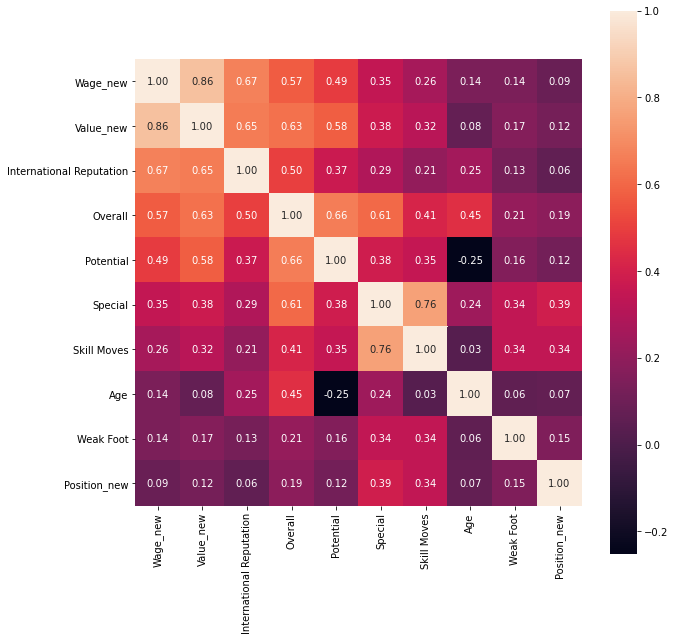

In [22]:
corrmat = fifa_sort_new.corr()

k=10
cols = corrmat.nlargest(k, 'Wage_new')['Wage_new'].index
cm = np.corrcoef(fifa_sort_new[cols].values.T)

plt.figure(figsize=(10, 10))
sns.heatmap(data = cm, cbar=True, annot=True, square=True, 
            fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

### 그럼 position 별로 평균 급여가 얼마인지 보겠음 - RF가 평균 급여가 제일 높고 골키퍼가 제일 낮음..
### 전체 상관성은 적어도 그 사람의 전체 stat을 보고 어느 포지션에 속할지 예측하면 wage도 예측할 수 있을까?
### 그럼 안되는게 만약 평균이 높다한들 그 사람의 overall이 낮아 wage를 적게 받을 수도 있음..

In [23]:
fifa_groupby_position = fifa_sort_columns.groupby(['Position']).mean().sort_values(by=['Wage_new'], ascending=False)
fifa_groupby_position[['Wage_new']]

,Wage_new
Position,
RF,52687.500000
LF,44666.666667
LAM,26142.857143
RAM,19095.238095
LS,15260.869565
RW,14432.432432
RCM,14404.092072
RS,14379.310345
LCM,14131.645570


# 데이터 시각화
### 각 인자 별 wage와 분포 확인
### Overall, potential은 비선형적이지만 양의 상관, Value는 X, Age는 정규분포화 가능

Text(0.5, 1.0, 'Relationship between Age and Wage')

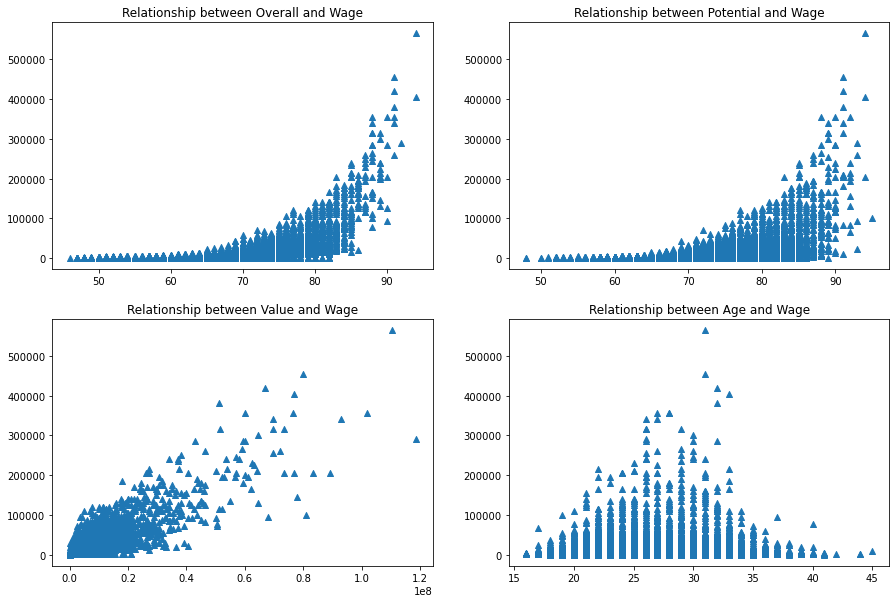

In [24]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs[0, 0].scatter(x=fifa_sort_new['Overall'], y=fifa_sort_new['Wage_new'], marker='^')
axs[0, 0].set_title('Relationship between Overall and Wage')
axs[0, 1].scatter(x=fifa_sort_new['Potential'], y=fifa_sort_new['Wage_new'], marker='^')
axs[0, 1].set_title('Relationship between Potential and Wage')
axs[1, 0].scatter(x=fifa_sort_new['Value_new'], y=fifa_sort_new['Wage_new'], marker='^')
axs[1, 0].set_title('Relationship between Value and Wage')
axs[1, 1].scatter(x=fifa_sort_new['Age'], y=fifa_sort_new['Wage_new'], marker='^')
axs[1, 1].set_title('Relationship between Age and Wage')

<AxesSubplot:xlabel='Position', ylabel='Overall'>

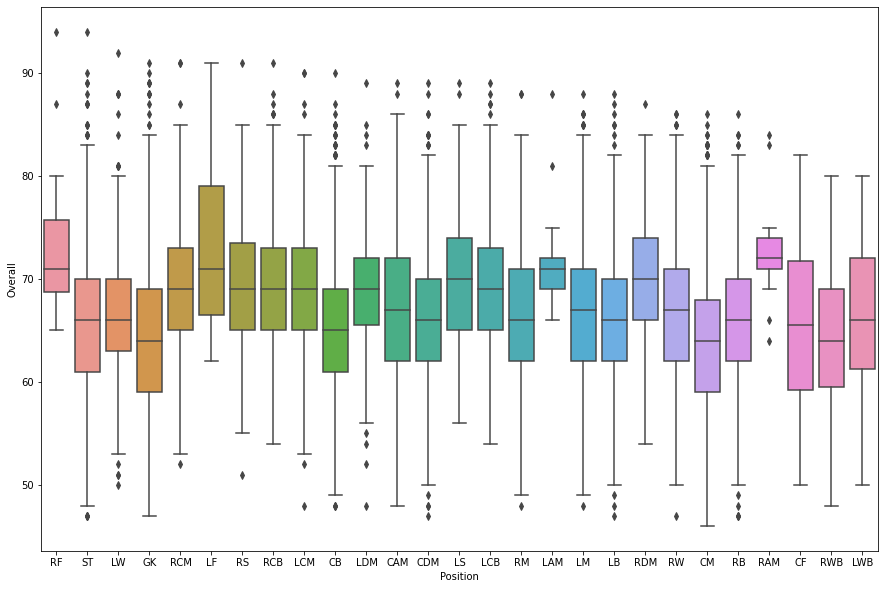

In [25]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Position', y='Overall', data=fifa_sort_columns)

## 알고리즘
### 먼저 스케일러

In [26]:
fifa_sort_new.head(5)

,Age,Overall,Special,Potential,International Reputation,Value_new,Position_new,Preferred Foot_new,Weak Foot,Skill Moves,Wage_new
0,31,94,2202,94,5.0,110500000.0,26,2,4.0,4.0,565000.0
1,33,94,2228,94,5.0,77000000.0,1,1,4.0,5.0,405000.0
2,26,92,2143,93,5.0,118500000.0,15,1,5.0,5.0,290000.0
3,27,91,1471,93,4.0,72000000.0,2,1,3.0,1.0,260000.0
4,27,91,2281,92,4.0,102000000.0,14,1,5.0,4.0,355000.0


In [27]:
fifa_sort_new2 = fifa_sort_new[['Overall', 'Potential', 'International Reputation', 'Value_new', 'Wage_new']]

In [28]:
#y = fifa_sort_new['Wage_new'].to_numpy

In [29]:
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()

#features = ["Special", "Value_new", "Wage_new"]
#autoscaler = StandardScaler()
#fifa_sort_new[features] = autoscaler.fit_transform(fifa_sort_new[features])

In [30]:
from sklearn.preprocessing import RobustScaler

robustScaler = RobustScaler()
features = ["Special", "Value_new", "Wage_new"]
fifa_sort_new[features] = robustScaler.fit_transform(fifa_sort_new[features])

In [32]:
fifa_sort_new.head(5)

,Age,Overall,Special,Potential,International Reputation,Value_new,Position_new,Preferred Foot_new,Weak Foot,Skill Moves,Wage_new
0,31,94,1.718182,94,5.0,64.602941,26,2,4.0,4.0,70.250
1,33,94,1.796970,94,5.0,44.897059,1,1,4.0,5.0,50.250
2,26,92,1.539394,93,5.0,69.308824,15,1,5.0,5.0,35.875
3,27,91,-0.496970,93,4.0,41.955882,2,1,3.0,1.0,32.125
4,27,91,1.957576,92,4.0,59.602941,14,1,5.0,4.0,44.000


In [39]:
X = fifa_sort_new[['Overall', 'Special', 'Potential', 'International Reputation','Value_new']]
y = fifa_sort_new['Wage_new']

In [41]:
X.shape, y.shape

((18147, 5), (18147,))

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

print(lin_reg.intercept_, lin_reg.coef_)

-1.4776680802289417 [ 0.01678099  0.0261297  -0.01170122  1.28846296  0.59653042]


In [68]:
print("test score :",lin_reg.score(X_train, y_train))
print("test score :",lin_reg.score(X_val, y_val))

test score : 0.7566062845920283
test score : 0.7636762549518139


In [61]:
from sklearn.metrics import mean_squared_error

predictions = lin_reg.predict(X_train)
lin_mse = mean_squared_error(y_train, predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1.3306022011846739

In [62]:
def display_scores(scores):
    print("scores :",scores)
    print("average :", scores.mean)
    print("std :", scores.std)

In [63]:
from sklearn.model_selection import cross_val_score
lin_scores = cross_val_score(lin_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

scores : [1.32873956 1.32148251 1.40733268 1.5410442  1.29708134 1.14357955
 1.39535089 1.38362017 1.23150096 1.23138908]
average : <built-in method mean of numpy.ndarray object at 0x000002350319DE10>
std : <built-in method std of numpy.ndarray object at 0x000002350319DE10>


In [64]:
from sklearn.metrics import mean_squared_error

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train set")
    plt.plot(np.sqrt(val_errors), "b-+", linewidth=3, label="val set")

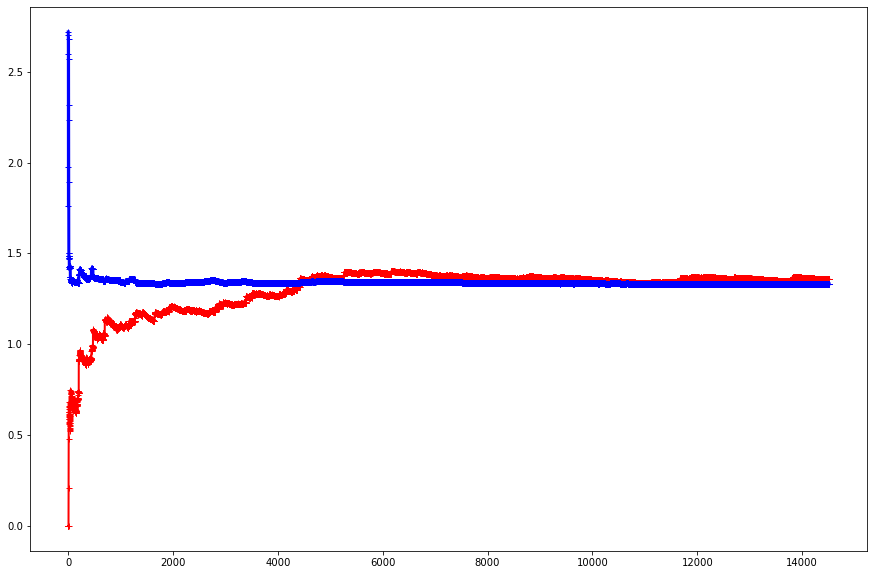

In [65]:
plt.figure(figsize=(15, 10))
plot_learning_curves(lin_reg, X, y)

In [69]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X_train, y_train)

print(sgd_reg.intercept_, sgd_reg.coef_)

[-1.25268789e+11] [ 2.41981984e+11  1.51768799e+11 -7.71805433e+10 -2.76592307e+11
 -1.94899751e+11]


In [70]:
print("test score :",sgd_reg.score(X_train, y_train))
print("test score :",sgd_reg.score(X_val, y_val))

test score : -1.3009592079753191e+25
test score : -1.3292757537092356e+25
